In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#1 Loading Data

In [28]:
df = pd.read_csv('NCVS_Select_-_Personal_Population.csv')
df.head()

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
0,204182769930938799999916201,2001.4,2001,6,2,2,1,1,88,-1,4,1,1,3,-1,4,-1,-2,-1,1938.505545
1,204182769936530499999916201,2001.4,2001,5,1,2,1,1,7,-1,1,1,4,1,-1,5,-1,-2,-1,1085.292835
2,204182769936628799999926201,2001.4,2001,3,2,2,1,1,88,-1,2,1,1,2,-1,5,-1,-2,-1,1065.509680
3,204182809902538799999916201,2001.4,2001,4,2,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,0.000000
4,204182809902538799999916202,2001.4,2001,4,1,1,1,6,6,-1,2,5,1,1,-1,5,-1,-2,-1,1321.547525


#2 Data Clean


In [29]:
dupes = df['idper'].duplicated()
dupes.loc[lambda x:x ==  True]
 

18583      True
18584      True
18585      True
18586      True
18587      True
           ... 
5651099    True
5651100    True
5651101    True
5651121    True
5651122    True
Name: idper, Length: 3873660, dtype: bool

In [30]:
for columns in df:
    print(df[columns].value_counts())

idper
264207125606308229282813401    8
262974897319650429208811401    8
262974225891225329202011402    8
264239755691453729533715402    8
264239755691453729533715401    8
                              ..
194988345501077499999926303    1
194988345501077499999926304    1
195002973091888299999924601    1
195002973091888299999924602    1
206049355841652356822515202    1
Name: count, Length: 1777471, dtype: int64
yearq
2019.1    76103
2021.1    76006
2019.2    75633
2019.3    75332
2021.2    74782
          ...  
2008.3    38209
2005.3    38168
2011.4    25483
1993.1    23724
1993.2    23663
Name: count, Length: 116, dtype: int64
year
2019    301100
2018    296017
2021    291878
2017    285904
2020    270566
1995    197366
1994    196865
2016    196186
2015    189711
1996    188010
2012    187684
2013    182699
2014    181178
2001    179143
2000    177923
1998    177654
1997    177603
1999    175524
2002    174252
2004    173796
2003    172703
2007    170869
2010    167444
2011    162867
20

In [31]:
df.loc[df[df['idper'].duplicated()==True].index]

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,popsize,region,msa,locality,educatn1,educatn2,veteran,citizen,wgtpercy
18583,242861485770309329284212301,2006.3,2006,4,2,2,1,1,7,-1,2,1,3,2,-1,5,7,-2,-1,1556.598230
18584,242861485770309329284212302,2006.3,2006,4,1,2,1,1,7,-1,2,1,3,2,-1,5,7,-2,-1,1861.313040
18585,242861893241090429828811301,2006.3,2006,5,1,2,1,1,88,-1,2,0,1,3,-1,4,4,-2,-1,1685.692665
18586,242861893241090429828811302,2006.3,2006,5,2,2,1,1,88,-1,2,0,1,3,-1,4,5,-2,-1,1642.831225
18587,242862018788339359824211301,2006.3,2006,4,1,2,1,1,88,-1,5,0,3,2,-1,5,6,-2,-1,1984.528370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651099,206032529939993056329911101,2021.3,2021,6,2,2,1,1,3,1,2,1,4,2,2,5,6,0,1,978.070908
5651100,206032529939993056329911102,2021.3,2021,6,1,2,1,1,3,1,2,1,4,2,2,5,7,9,9,0.000000
5651101,206034520339251756569913101,2021.3,2021,4,2,2,1,1,5,2,1,1,4,1,2,5,6,0,1,1515.518460
5651121,206038416535157456458412101,2021.3,2021,5,2,2,1,1,4,2,4,1,4,1,2,5,6,0,1,1423.344301


In [32]:
for columns in df:
    print(df[columns].unique())

['204182769930938799999916201' '204182769936530499999916201'
 '204182769936628799999926201' ... '206044131546927556441514101'
 '206049355841652356822515201' '206049355841652356822515202']
[2001.4 2001.2 2000.1 2004.4 1997.1 1995.2 1999.2 1996.2 1994.2 2003.1
 2007.1 2005.4 2005.3 1998.4 1993.1 1997.4 2005.2 2007.3 2004.1 2003.3
 2000.4 2002.4 2002.2 2008.1 2004.3 2003.4 2007.4 2006.2 2006.3 2005.1
 2007.2 2006.4 2006.1 2004.2 1998.1 2008.2 1999.3 1993.2 1994.3 1997.2
 1993.3 2000.2 1995.3 2003.2 1996.3 1999.1 1998.2 2002.1 2001.3 1994.4
 1993.4 1999.4 2002.3 2001.1 1997.3 1995.4 2000.3 1996.4 1995.1 1994.1
 1998.3 1996.1 2012.1 2013.3 2017.2 2010.2 2016.2 2015.1 2018.1 2018.3
 2013.4 2012.2 2010.3 2016.3 2008.3 2015.2 2018.4 2010.4 2008.4 2014.1
 2012.3 2017.3 2015.3 2016.4 2009.1 2018.2 2011.1 2012.4 2014.2 2009.2
 2011.2 2015.4 2013.1 2014.3 2009.3 2017.1 2017.4 2011.3 2009.4 2013.2
 2016.1 2014.4 2011.4 2010.1 2019.4 2019.3 2020.2 2020.1 2020.3 2020.4
 2021.1 2021.2 2021.3 2021.4 20

In [33]:
for columns in df:
    print(columns,df[columns].isnull().sum())
   

idper 0
yearq 0
year 0
ager 0
sex 0
hispanic 0
race 0
race_ethnicity 0
hincome1 0
hincome2 0
marital 0
popsize 0
region 0
msa 0
locality 0
educatn1 0
educatn2 0
veteran 0
citizen 0
wgtpercy 0


#2 Data Drop

In [34]:
percentageMissing1 = (df['hincome2'] == -1).sum()/df['hincome2'].count()* 100
percentageMissing2 = (df['locality'] == -1).sum()/df['locality'].count()* 100
percentageMissing3 = (df['veteran'] == -2).sum()/df['veteran'].count()* 100
percentageMissing4 = (df['citizen'] == -1).sum()/df['citizen'].count()* 100

print("hincome2 : ",percentageMissing1)
print("locality : ",percentageMissing2)
print("veteran : ",percentageMissing3)
print("citizen : ",percentageMissing4)

hincome2 :  74.42166886593144
locality :  90.04723125335443
veteran :  74.42166886593144
citizen :  74.42166886593144


In [35]:
df = df.drop(columns=['yearq','hispanic','race_ethnicity','hincome2','locality','msa','veteran','citizen','wgtpercy'])

In [36]:
df = df.drop(df[df['sex'] == 1].index)

Dropped Columns:

| No. | Columns | Reason |
| --- | --- | --- |
| 1 | yearq | yearq is irrelevant as we have year|
| 2 | hispanic | irrelevant|
| 3 | race_ethnicity | irrelevant, using race|
| 4 | hincome2 | 74% rows invalid data|
| 5 | locality | 90% rows invalid data|
| 6 | msa| irrelevant|
| 7 | veteran| 74% rows invalid data|
| 8 | citizen| 74% rows invalid data|
| 9 | wgtpercy|not sure how to use it in this analysis|
| 10 | sex == 1|male population|

Drop IDper Duplicates


In [37]:
df = df.drop_duplicates(keep='first')

#3 Data Visualizations

In [38]:
dfv = pd.DataFrame()

In [39]:
len(df)

2278070

In [40]:
df.columns

Index(['idper', 'year', 'ager', 'sex', 'race', 'hincome1', 'marital',
       'popsize', 'region', 'educatn1', 'educatn2'],
      dtype='object')

[Text(0, 0, '421742'),
 Text(0, 0, '365384'),
 Text(0, 0, '567263'),
 Text(0, 0, '486526'),
 Text(0, 0, '206376'),
 Text(0, 0, '230779')]

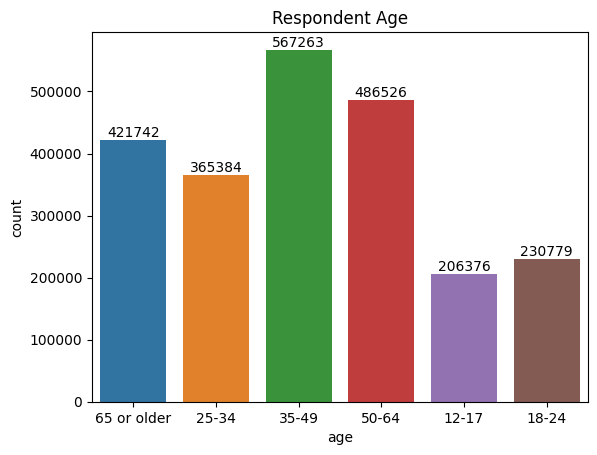

In [43]:
title = 'Respondent Age'
plt.title(title)
plt.xlabel('Age Group')
temp = []
for row in df['ager']:
    if row == 1:
        temp.append("12-17")
    if row == 2:
        temp.append("18-24")
    if row == 3:
        temp.append("25-34")
    if row == 4:
        temp.append("35-49")
    if row == 5:
        temp.append("50-64")
    if row == 6:
        temp.append("65 or older")

dfv = pd.DataFrame()
dfv['age'] = temp

fig = sns.countplot(x=dfv['age'])
fig.bar_label(fig.containers[0])
#plt.savefig(f'{title}.png',format='png')


Population follows a regular population distribution

<Axes: title={'center': 'Population Income'}, xlabel='income', ylabel='count'>

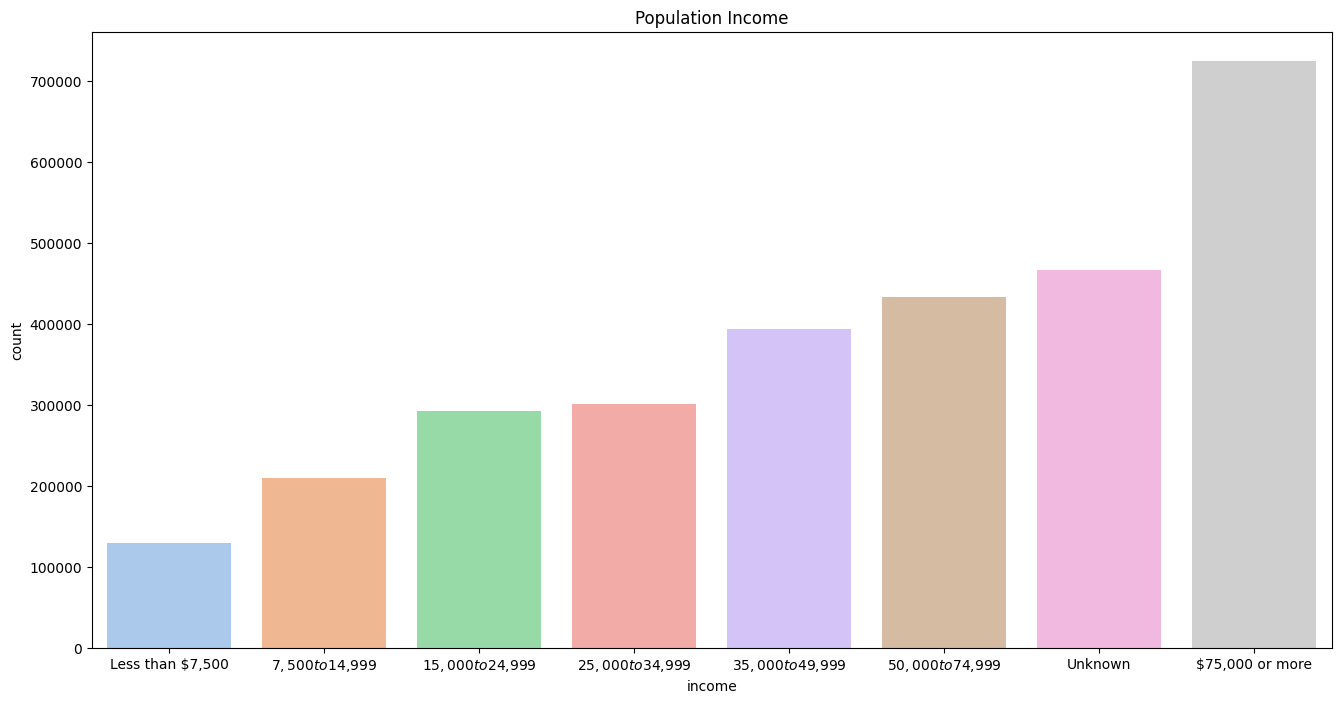

In [ ]:
title = "Population Income"
plt.figure(figsize=(16,8))
plt.title(title)
colors = sns.color_palette('pastel')
dict = {1:'Less than $7,500',2:'$7,500 to $14,999',3:'$15,000 to $24,999',4:'$25,000 to $34,999',
        5:'$35,000 to $49,999',6:'$50,000 to $74,999',7:'$75,000 or more',88:'Unknown',}
dfv['income'] = [dict[row] for row in df['hincome1']]
sns.countplot(x=dfv['income'], order = dfv['income'].value_counts(ascending=True).index,palette=sns.color_palette('pastel'))

<Axes: title={'center': 'Population Region'}, xlabel='region', ylabel='count'>

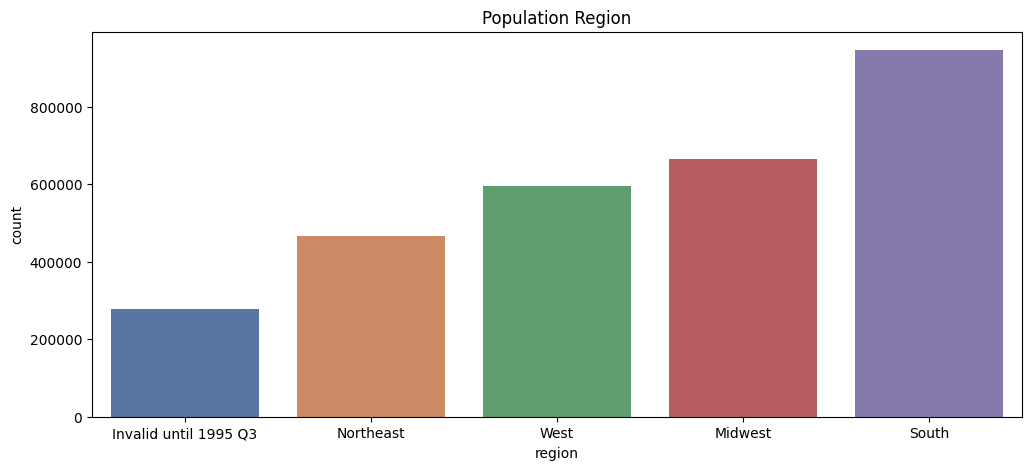

In [ ]:
title = "Population Region"
plt.figure(figsize=(12,5))
plt.title(title)
colors = sns.color_palette('deep')
dict = {-1:'Invalid until 1995 Q3',1:'Northeast',2:'Midwest',3:'South',
        4:'West'}
dfv['region'] = [dict[row] for row in df['region']]
sns.countplot(x=dfv['region'], order = dfv['region'].value_counts(ascending=True).index,palette=colors)

<Axes: title={'center': 'Population Race'}, xlabel='race', ylabel='count'>

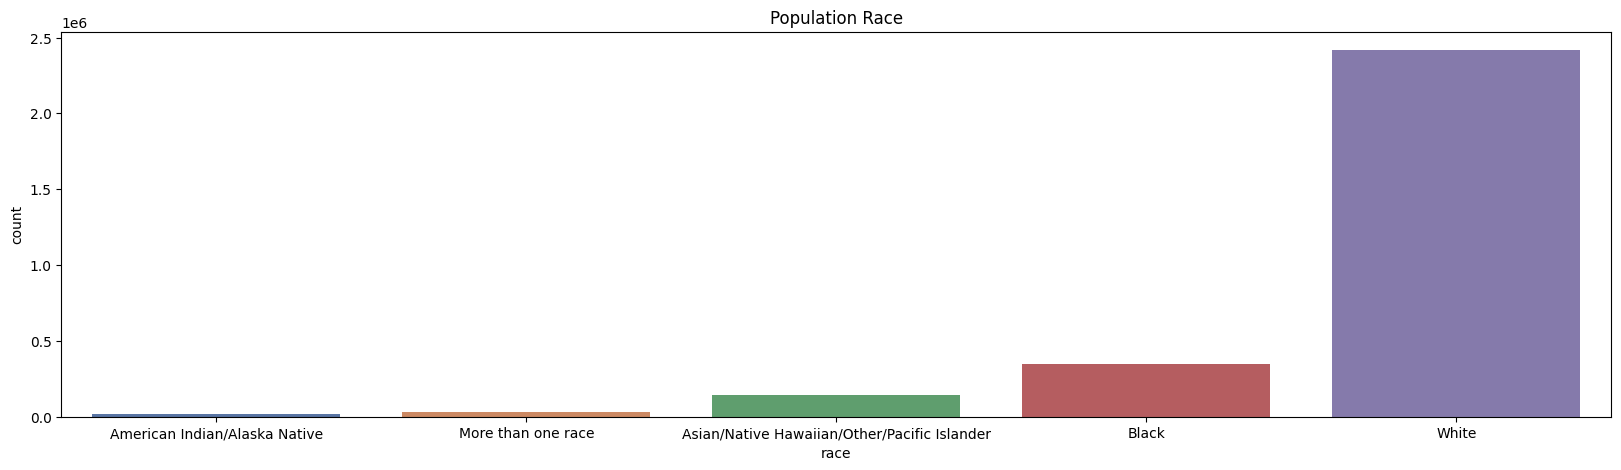

In [ ]:
title = "Population Race"
plt.figure(figsize=(20,5))
plt.title(title)
colors = sns.color_palette('deep')
dict = {1:'White',2:'Black',3:'American Indian/Alaska Native',
        4:'Asian/Native Hawaiian/Other/Pacific Islander', 5:'More than one race'}
dfv['race'] = [dict[row] for row in df['race']]
sns.countplot(x=dfv['race'], order = dfv['race'].value_counts(ascending=True).index,palette=colors)

Majority of respondents are white

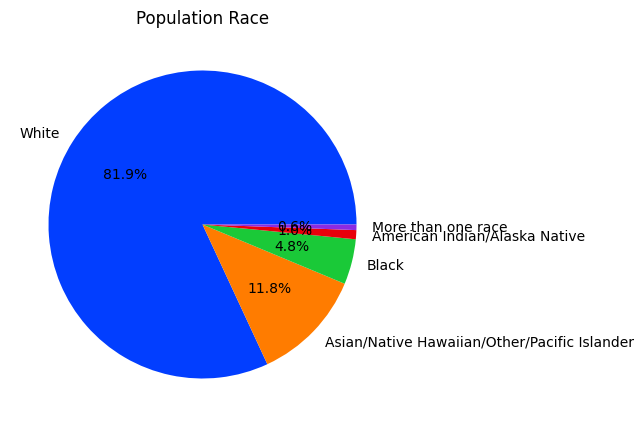

In [ ]:
palette_color = sns.color_palette('bright')
plt.figure(figsize=(5,5))
plt.pie(dfv['race'].value_counts().tolist(), labels=dfv['race'].unique().tolist(), colors=palette_color,autopct='%.1f%%')
plt.title(title)
plt.show()